# Plotting sim 1

This code implements a plot for the presentation of the results of 'sim_1'. 'sim_1' is the simulation that tracks keys deviation for attack rounds. This code is able to generate plot from the output files of 'sim_1' or from a 'Countsketch_median_attack' object that consist the results of a simulation.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from numpy.random import default_rng
import math

class Plot_sim_1():
    def __init__(self, num_of_rounds=10000, nof_repititions = 10, nof_sim_keys=11, tail_size=1000, b=30, l=100, seed=None):
        self.num_of_rounds = num_of_rounds
        self.nof_repititions = nof_repititions
        self.nof_sim_keys = nof_sim_keys
        self.nof_recorded_keys = 3
        self.tail_size = tail_size
        self.l = l
        self.b = b
        self.seed = seed
        self.rng = default_rng(seed)
        #self.data = np.zeros((self.num_of_rounds, self.nof_sim_keys), dtype=float)

    def __repr__(self):
        return "test parameters (for plotting):\n number of rounds = {0}; number of repititions = {6}\n num of keys simulated = {1};\n attack tail size = {2};\n l = {3};\n b = {4}; seed = {5};" \
            .format(self.num_of_rounds, self.nof_sim_keys, self.tail_size, self.l, self.b, self.seed, self.nof_repititions)

    def load_data(self, data_path = "./results/data/", file_pef = "sim_1_run_rep_"):
        self.data = np.zeros((self.nof_repititions, self.num_of_rounds, self.nof_recorded_keys), dtype=float)
        for rep in range(self.nof_repititions):
            file_name_sim_1 = file_pef + "{0}.csv".format(rep)
            file_full_name = data_path + file_name_sim_1
            loaded_np_array = np.loadtxt(file_full_name, delimiter=',')
            print("loaded file {0}, data shape {1}, last record: {2}".format(file_full_name, loaded_np_array.shape, loaded_np_array[-1]))
            self.data[rep] = loaded_np_array
    def get_data(self, data):
        self.data = data
    
    def gen_results(self):
        self.sim_1_mean = np.mean(self.data, axis = 0)
        self.sim_1_max  = np.max(self.data, axis = 0)
        self.sim_1_min  = np.min(self.data, axis = 0)
        
    #after loading data
    def plot_results(self, presented_rounds=None, file_name=None):
        if presented_rounds is None:
            presented_rounds = self.data.shape[1]
        rounds = np.arange(presented_rounds)

        # golden ratio, width adapted ti title fontsize 14
        plt.rcParams["figure.figsize"] = (6.75, 4.17)
        plt.rcParams.update({"text.usetex": True, "font.family": "serif", "font.serif": ['Computer Modern Roman']})
        # 'New Century Schoolbook', 'Bookman', 'Times', 'Palatino', 'Charter', 'Computer Modern Roman'
        
        title   = "Median estimator ($k={2}$) attack: sketch parameters: $l={0}, b={1}$".format(self.l, self.b, self.nof_sim_keys-1)
        xlabel  = "Number of attack rounds ($r$)"
        ylabel  = r'$\texttt{median(key-counters)} / \sigma$'
        plt.title (title , fontsize=14)
        plt.xlabel(xlabel, fontsize=12)
        plt.ylabel(ylabel, fontsize=12)
        # plot mean
        plt.plot(rounds, self.sim_1_mean[:presented_rounds, 0], color='green', label="positive bias key")
        plt.plot(rounds, self.sim_1_mean[:presented_rounds, 1], color='red',   label="negative bias key")
        plt.plot(rounds, self.sim_1_mean[:presented_rounds, 2], color='blue',  label="unbiased key")
        # plot max... min
        plt.fill_between(rounds, self.sim_1_min[:presented_rounds, 0], self.sim_1_max[:presented_rounds, 0], alpha=0.2)
        plt.fill_between(rounds, self.sim_1_min[:presented_rounds, 1], self.sim_1_max[:presented_rounds, 1], alpha=0.2)
        plt.fill_between(rounds, self.sim_1_min[:presented_rounds, 2], self.sim_1_max[:presented_rounds, 2], alpha=0.2)
        # leggend
        plt.legend(loc="upper left")
        #save and show
        if file_name is not None:
            full_file_name = "./results/{0}.png".format(file_name)
            plt.savefig(full_file_name, dpi=600)  # save as png, margins are cut when saving from Jupyter notebook
            print("saved figure in {0}".format(full_file_name))
        plt.show()

## plotting with single shot:

test parameters (for plotting):
 number of rounds = 10000; number of repititions = 10
 num of keys simulated = 11;
 attack tail size = 1000;
 l = 100;
 b = 30; seed = None;
loaded file ./results/data/sim_1_run_rep_0.csv, data shape (10000, 3), last record: [ 4.96382126e+00 -5.11454056e+00 -2.97472309e-03]
loaded file ./results/data/sim_1_run_rep_1.csv, data shape (10000, 3), last record: [ 3.43675133 -3.31661166 -0.16081688]
loaded file ./results/data/sim_1_run_rep_2.csv, data shape (10000, 3), last record: [ 4.93668567 -5.31688298  0.05389395]
loaded file ./results/data/sim_1_run_rep_3.csv, data shape (10000, 3), last record: [ 3.56958978 -3.79245002 -0.02773797]
loaded file ./results/data/sim_1_run_rep_4.csv, data shape (10000, 3), last record: [ 3.0402967  -3.01700298 -0.06988117]
loaded file ./results/data/sim_1_run_rep_5.csv, data shape (10000, 3), last record: [ 4.65691577 -4.97727895  0.10872932]
loaded file ./results/data/sim_1_run_rep_6.csv, data shape (10000, 3), last record:

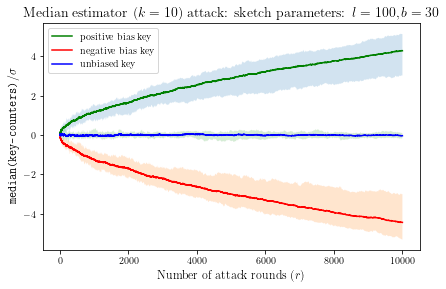

In [2]:
sim_results_data_files_path = "./results/data/"

plot = Plot_sim_1()
print(plot)
plot.load_data(sim_results_data_files_path)

plot.gen_results()

plot.plot_results(file_name = "sim_1_plot_v_01")

## building blocks of run

In [29]:
shell_data = plot.data
print(shell_data.shape)

(10, 10000, 3)


In [43]:
plot = Plot_sim_1()
plot.get_data(shell_data)

In [44]:
plot.gen_results()
print(plot.sim_1_mean.shape)

(10000, 3)


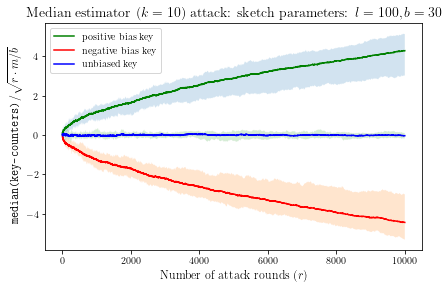

In [47]:
plot.plot_results(file_name = "sim_1_plot")